In [1]:
import pyportlib
pyportlib.set_client_dir()
update_data = True

# Portfolio Summary Example

In [2]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')

q = pyportlib.QuestradeConnection(account_name='tfsa')

2022-03-16 16:28:08,286:ERROR:no market value computed for BPY.UN.TO: in _load_market_value
2022-03-16 16:28:08,309:ERROR:no market value computed for LGND: in _load_market_value


In [3]:
if update_data:
    ptf.update_data(fundamentals_and_dividends=False)
    benchmark.update_data(fundamentals_and_dividends=False)


1 Failed download:
- BPY-UN.TO: No data found, symbol may be delisted


2022-03-16 16:28:36,006:ERROR:no market value computed for BPY.UN.TO: in _load_market_value
2022-03-16 16:28:36,029:ERROR:no market value computed for LGND: in _load_market_value


In [4]:
if update_data:
    q.update_transactions(ptf)

## 3-Month Returns

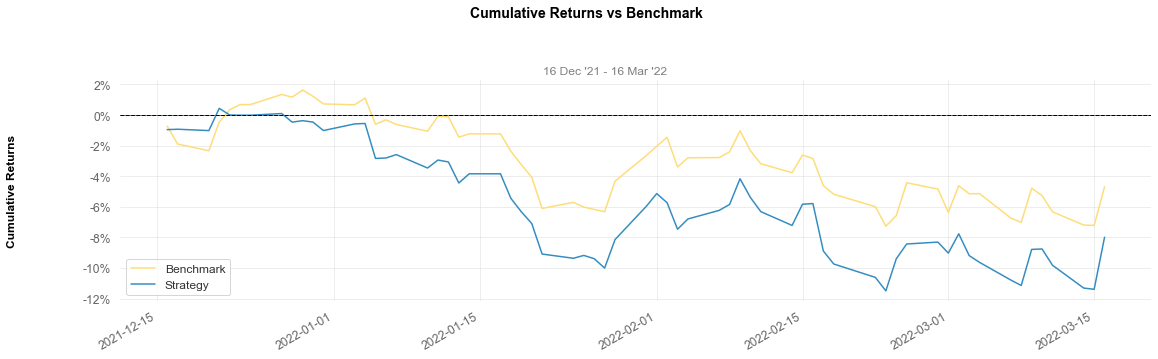

In [5]:
figsize = (16, 5)
pyportlib.plots.returns(ptf, lookback='3m', benchmark=benchmark, figsize=figsize)

## 6-Month Returns

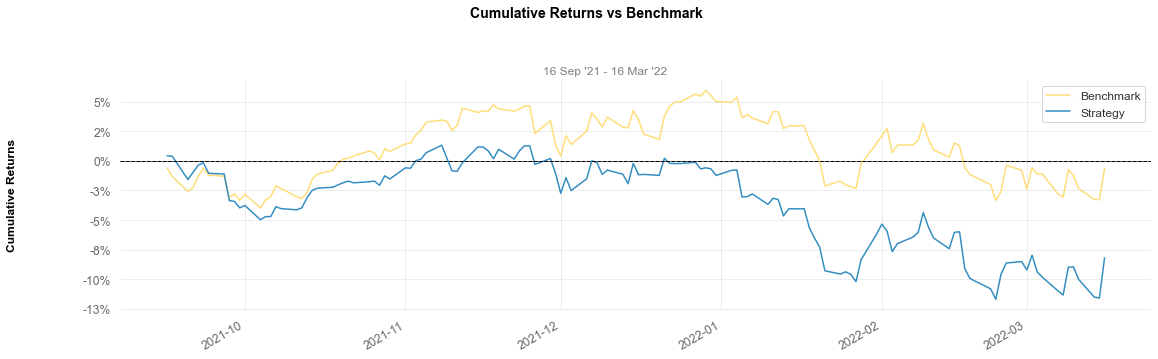

In [6]:
pyportlib.plots.returns(ptf, lookback='6m', benchmark=benchmark, figsize=figsize)

## 1-Year Returns

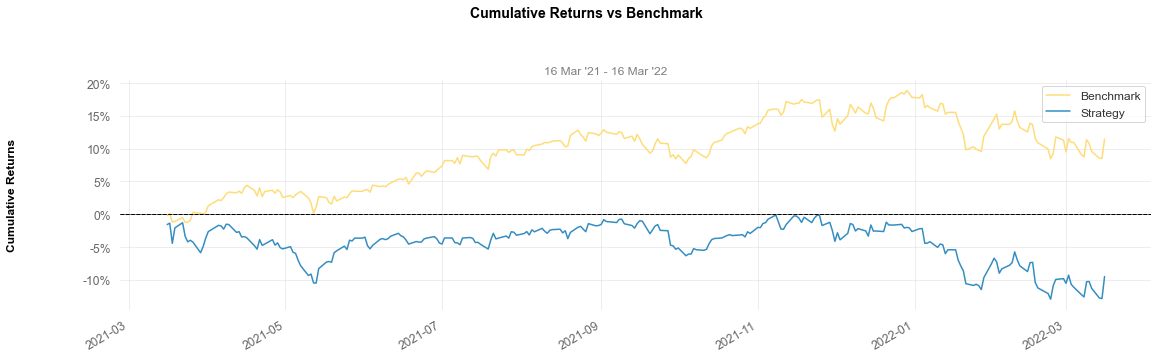

In [7]:
pyportlib.plots.returns(ptf, lookback='1y', benchmark=benchmark, figsize=figsize)

## 5-Year Returns

2022-03-16 16:28:45,731:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


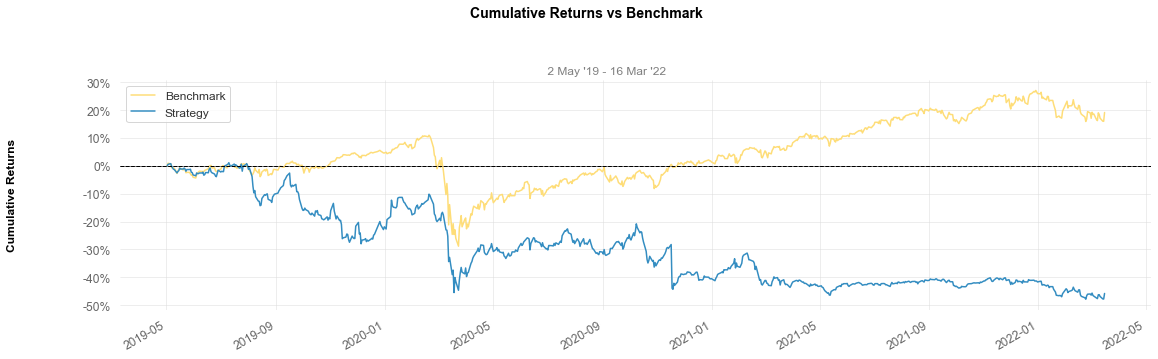

In [8]:
pyportlib.plots.returns(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling Volatility

2022-03-16 16:28:47,069:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


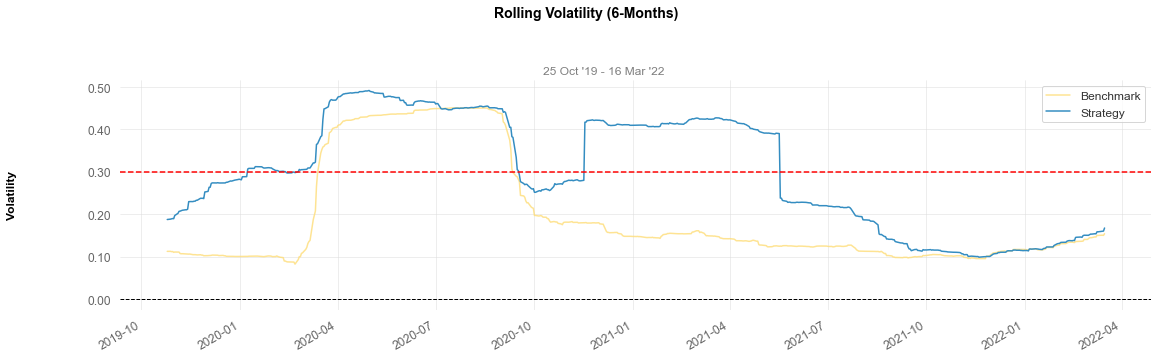

In [9]:
pyportlib.plots.rolling_vol(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling Beta

2022-03-16 16:28:48,414:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


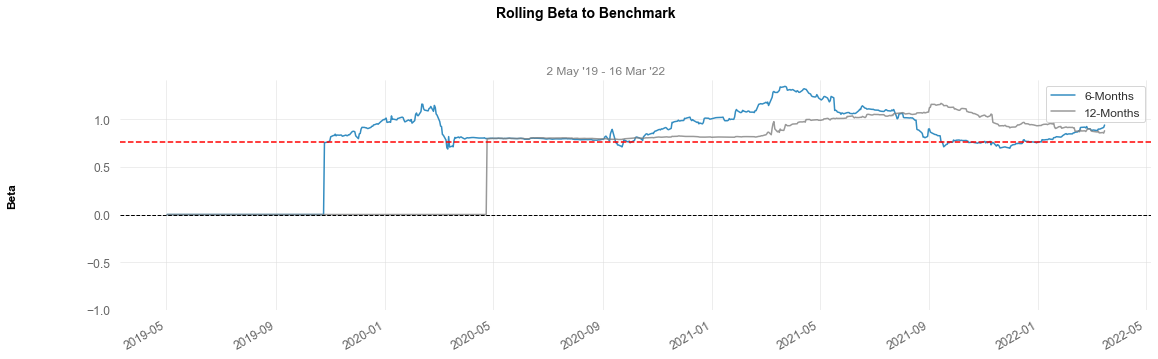

In [10]:
pyportlib.plots.rolling_beta(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling alpha

2022-03-16 16:28:49,753:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


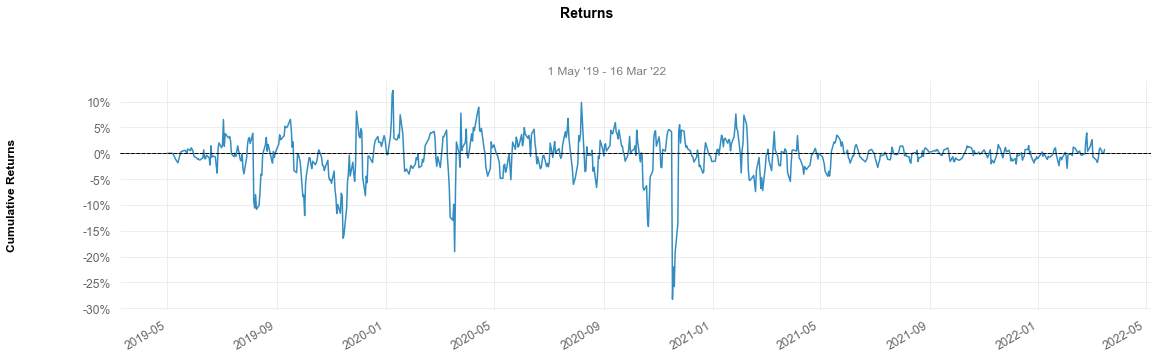

2022-03-16 16:28:51,063:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


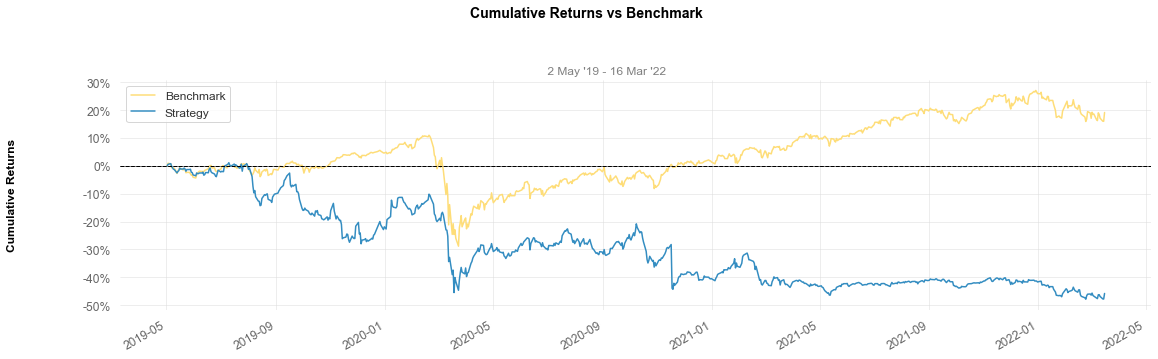

In [11]:
rolling_alpha = pyportlib.stats.rolling_alpha(ptf, lookback='5y', benchmark=benchmark, rolling_period=5)
pyportlib.plots.returns(rolling_alpha, lookback='5y', figsize=figsize, compound=False)
pyportlib.plots.returns(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Rolling Sharpe

2022-03-16 16:28:52,534:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


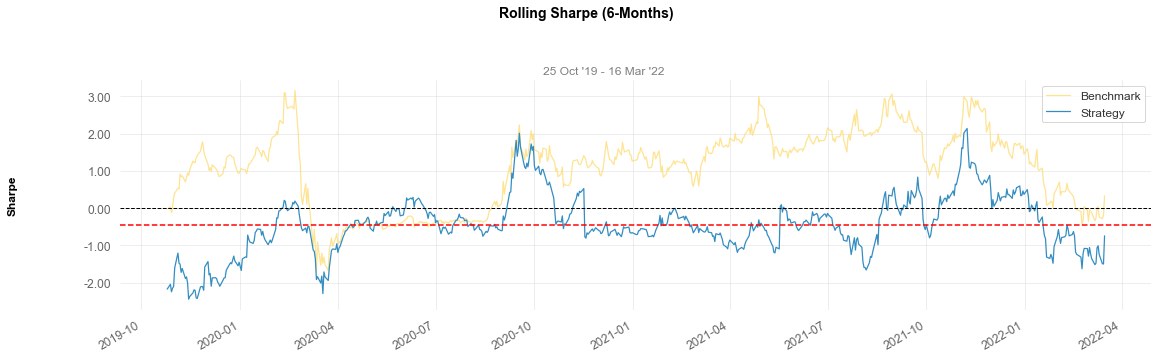

In [12]:
pyportlib.plots.rolling_sharpe(ptf, lookback='5y', benchmark=benchmark, figsize=figsize)

## Returns distribution

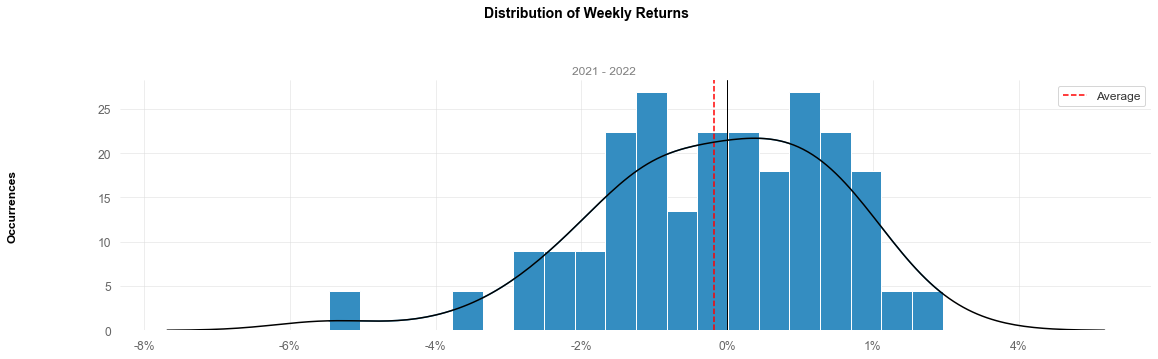

In [13]:
pyportlib.plots.distribution(ptf, lookback='1y', figsize=figsize, resample='W')

## Stats

In [14]:
lookback = '1y'
print(f"{lookback} skewness: {pyportlib.stats.skew(ptf, lookback=lookback)}")
print(f"{lookback} kurtosis: {pyportlib.stats.kurtosis(ptf, lookback=lookback)}")
print(f"{lookback} vol: {pyportlib.stats.annualized_volatility(ptf, lookback=lookback)}")
print(f"{lookback} beta: {pyportlib.stats.beta(ptf, benchmark=benchmark, lookback=lookback)}")
print(f"{lookback} alpha: {pyportlib.stats.alpha(ptf, benchmark=benchmark, lookback=lookback)}")

1y skewness: 0.13295713602506967
1y kurtosis: 1.7154457624693809
1y vol: 0.1504826348035561
1y beta: 0.9058525700763962
1y alpha: -0.19425603335888594


## Correlation Clusters

<AxesSubplot:>

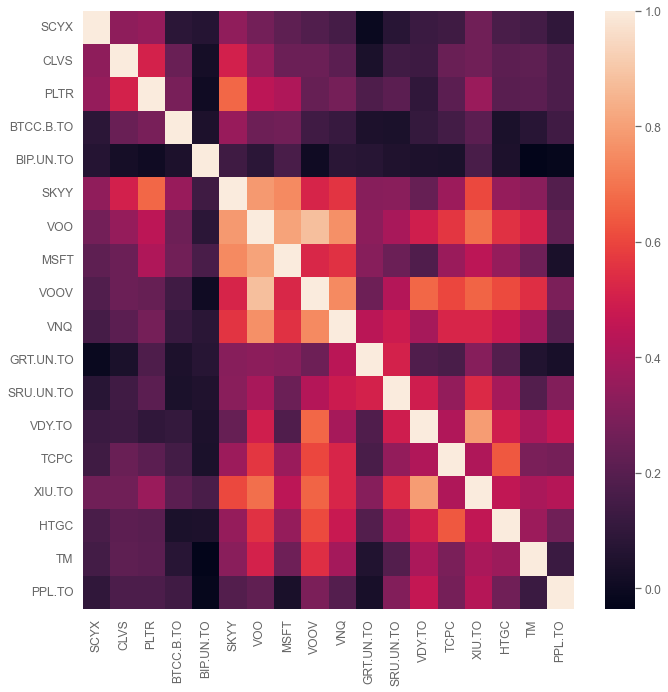

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

corr_mat = pyportlib.stats.cluster_corr(ptf.corr(date=datetime(2022, 3, 11)))

plt.figure(figsize = (11,11))
sns.heatmap(corr_mat)

## Portfolio earnings

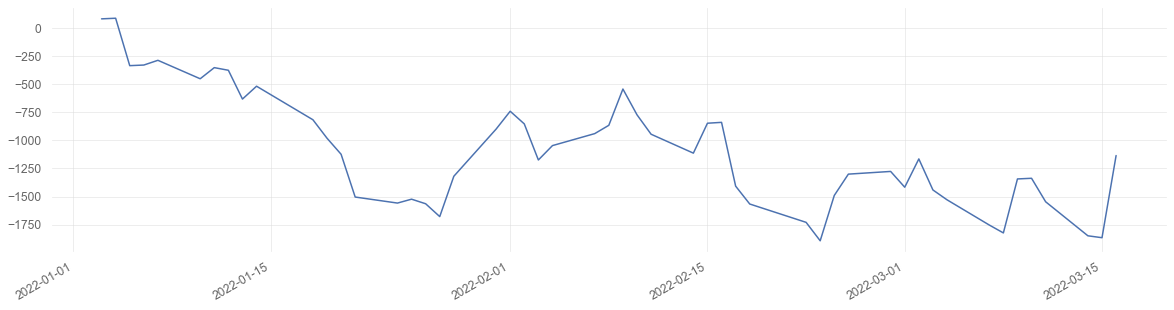

In [16]:
dol_rets = ptf.daily_total_pnl(start_date=datetime(2022, 1, 1)).sum(axis=1).cumsum().plot(figsize=(20, 5))

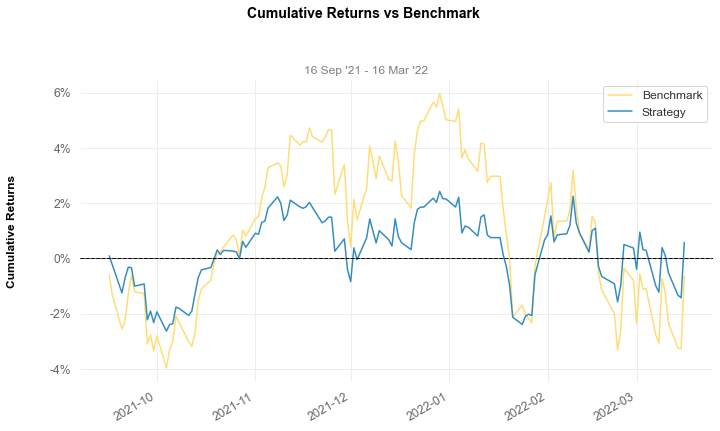

In [17]:
positions_to_exclude = ["PLTR", 'SCYX']
pyportlib.plots.returns(ptf, positions_to_exclude=positions_to_exclude, benchmark=benchmark, lookback='6m')